In [1]:
import numpy
from matplotlib import pyplot
%matplotlib inline

In [2]:
#set initial conditions:
rhomax=10.0
umax=1.0
nx=81
L=4
nt=40
dx=L/(nx-1)
x=numpy.linspace(0,L,num=nx)


In [3]:
def redlight(rhomax,x):
    rho=rhomax*numpy.ones_like(x)
    mask=numpy.where((x>=0)&(x<=3))
    rho[mask]=0.5*rhomax
    return rho

In [4]:
rho0=redlight(rhomax,x)

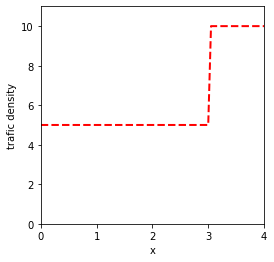

In [5]:
pyplot.figure(figsize=(4,4))
pyplot.xlabel('x')
pyplot.ylabel('trafic density')
pyplot.xlim(0,L)
pyplot.ylim(0,11)
pyplot.plot(x,rho0,color='r',linestyle='--',linewidth=2)

In [6]:
def flux(rho,umax,rhomax):
    F=umax*(1-(rho/rhomax))
    return F

In [7]:
def scheme(rho0,nt,dx,dt,umax,rhomax): 
    rho=rho0.copy()
    for n in range (nt):
        F=flux(rho,umax,rhomax)
        rho[1:-1]=rho[1:-1]-(dt/(2*dx))*(F[2:]-F[:-2])
    return rho

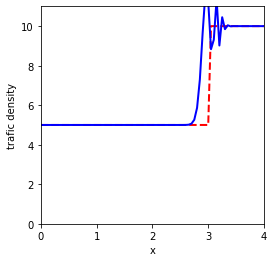

In [8]:
sigma=1
dt=sigma*(dx/umax)
g=scheme(rho0,nt,dx,dt,umax,rhomax)
pyplot.figure(figsize=(4,4))
pyplot.xlabel('x')
pyplot.ylabel('trafic density')
pyplot.xlim(0,L)
pyplot.ylim(0,11)
pyplot.plot(x,rho0,color='r',linestyle='--',linewidth=2)
pyplot.plot(x,g,color='b',linestyle='-',linewidth=2)

In [9]:
#lax-friendrichs
def lax(rho0,nt,dt,dx,umax,rhomax):
    rho_l=rho0.copy()
    for n in range(nt):
        F=flux(rho_l,umax,rhomax)
        rho_l[1:-1]=((rho_l[2:]+rho_l[:-2])/2)-(dt/2*dx)*(F[2:]-F[:-2])
    return rho_l

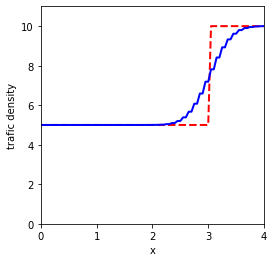

In [10]:

sigma_1=0.5
dt_1=sigma_1*(dx/umax)
h=lax(rho0,nt,dt_1,dx,umax,rhomax)
pyplot.figure(figsize=(4,4))
pyplot.xlabel('x')
pyplot.ylabel('trafic density')
pyplot.xlim(0,L)
pyplot.ylim(0,11)
pyplot.plot(x,rho0,color='r',linestyle='--',linewidth=2)
pyplot.plot(x,h,color='b',linestyle='-',linewidth=2)


In [24]:
# macromac scheme
def macromack(rho0,nt,dt,dx,umax,rhomax):
    rho2=rho0.copy()
    for n in range(nt):
        F=flux(rho2,umax,rhomax)
        rhonew=rho2[:-2]-(dt/dx)*(F[2:]-F[:-2])
        F1=flux(rhonew,umax,rhomax)
        rho2[1:-1]=0.5*(rho2[1:-1]+rhonew[:]-(dt/dx)*(F[1:-1]-F[:-2]))
    return rho2
        

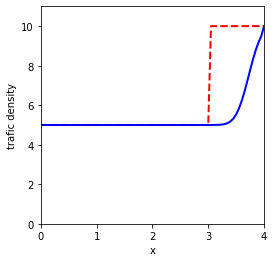

In [26]:
sigma_1=1
dt_1=sigma_1*(dx/umax)
l=macromack(rho0,nt,dt_1,dx,umax,rhomax)
pyplot.figure(figsize=(4,4))
pyplot.xlabel('x')
pyplot.ylabel('trafic density')
pyplot.xlim(0,L)
pyplot.ylim(0,11)
pyplot.plot(x,rho0,color='r',linestyle='--',linewidth=2)
pyplot.plot(x,l,color='b',linestyle='-',linewidth=2)
